In [56]:
#nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
import scipy
from ipywidgets import interact
from numpy.linalg import norm
from scipy.sparse import linalg
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_circles, make_blobs

In [57]:
#nbi:hide_in
def spectral_clustering(A, K, seed):
    # Calculate Laplacian
    D = np.zeros(A.shape)
    w = np.sum(A, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)
    L = D.dot(A).dot(D)
    
    # Calculate Eigen Values
    e_val, e_vect = linalg.eigs(L, K)
    X = e_vect.real
    X_norm = norm(X, axis=1, ord=2)
    Y = (X.T / X_norm).T
    
    # Cluster
    kmeans = KMeans(n_clusters=K, random_state=seed)
    return kmeans.fit(X).labels_    

In [58]:
#nbi:hide_in
def gen_aff(X):
    N = X.shape[0]
    ans = np.zeros((N, N))
    sig = []
    for i in range(N):
        dists = []
        for j in range(N):
            dists.append(norm(X[i] - X[j]))
        dists.sort()
        sig.append(np.mean(dists[:5]))

    for i in range(N):
        for j in range(N):
            dist = norm(X[i] - X[j]) ** 2
            ans[i][j] = np.exp(- dist / (2 * sig[i] * sig[j]))
    return ans

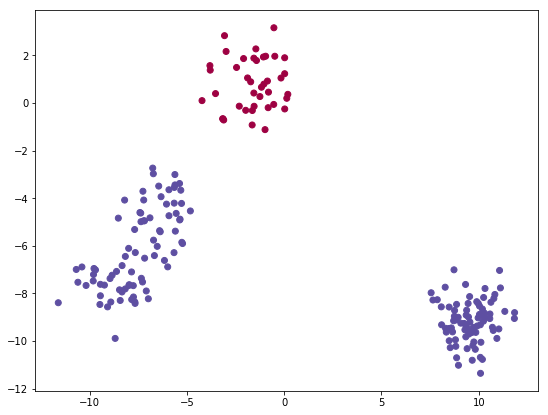

In [59]:
#nbi:hide_in
#nbi:hide_out

X_mn, y_mn = make_blobs(n_samples=200, centers=5, cluster_std=1.0)
#X_mn, y_mn = make_moons(n_samples=150, noise=0.1)

# X_mn1, y_mn1 = make_circles(n_samples=150, noise=0.1)
# X_mn2, y_mn2 = make_circles(n_samples=150, noise=0.05)

# X_mn2 = np.array(X_mn2)*4
# y_mn2 = np.array(y_mn2)

# X_mn = np.concatenate((X_mn1,X_mn2), axis = 0)
# y_mn = np.append(y_mn1, y_mn2)


K = 2
A = gen_aff(X_mn)
Y = spectral_clustering(A, K, seed=1111)

cmap = 'Spectral'
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X_mn[:, 0], X_mn[:, 1], c=Y, cmap=cmap)

In [60]:
# #nbi:hide_in
# #nbi:hide_out
# def generate(n_samples, centers, seed):
#     X_mn, y_mn = make_blobs(n_samples=n_samples, centers=centers, cluster_std=1.0, random_state = seed)
#     cmap = 'Spectral'
#     plt.scatter(X_mn[:, 0], X_mn[:, 1], c=y_mn, cmap=cmap)
#     A = gen_aff(X_mn)
#     return A

# interact(generate, n_samples=(100, 1000, 1), centers=(1, 10, 1), seed=(0, 500, 1));

In [61]:
# #nbi:hide_in
# #nbi:hide_out
# def cluster(k):
#     labels = spectral_clustering(A, k, seed=1111)
#     cmap = 'Spectral'
#     plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labels, cmap=cmap)

# interact(cluster, k=(0, 10, 1));

In [66]:
#nbi:hide_in
def spectral_cluster(k , data_type, n_samples, centers, seed, noise):
    if data_type == "Blob":
        X_mn, y_mn = make_blobs(n_samples=n_samples, centers=centers, cluster_std=1.0, random_state = seed)
    elif data_type == "Moon":
        X_mn, y_mn = make_moons(n_samples=n_samples, random_state = seed, noise = noise)
    else:
        pass
    A = gen_aff(X_mn)
    labels = spectral_clustering(A, k, seed=1111)
    cmap = 'Spectral'
    plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labels, cmap=cmap)
    
interact(spectral_cluster, k = (1, 10, 1), data_type = ["Blob", "Moon", "Circle"],  n_samples=(10, 200, 1), centers=(1, 10, 1), noise = (0, 0.1, 0.01), seed=(0, 500, 1));

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Dropdown(description='data_type', op…